In [2]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

In [4]:
dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

In [5]:
dx

array([[-0.56531574, -6.46184582,  4.08223234, -1.38698603,  1.95699556,
         1.87812828, -3.57239294,  2.24981052]])

In [6]:
# coding: utf-8
from common.np import *  # import numpy as np
from common.config import GPU
from common.functions import softmax, cross_entropy_error


class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

ModuleNotFoundError: No module named 'common'

In [8]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


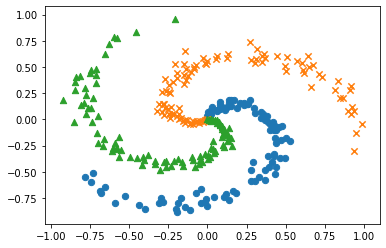

In [9]:
# データ点のプロット
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [10]:
# coding: utf-8
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

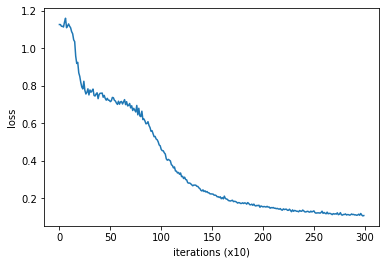

In [11]:
# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

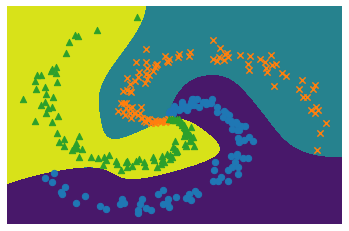

In [13]:
# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# データ点のプロット
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

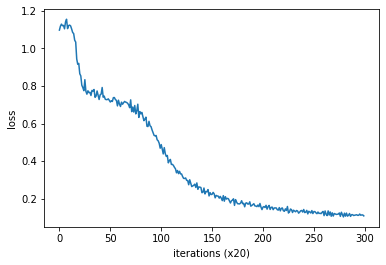

In [21]:
# coding: utf-8
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=20)
trainer.plot()

In [23]:
import numpy as np
a = np.random.randn(3)
a

array([-0.14299829, -0.35698481,  1.53889751])

In [24]:
a.dtype

dtype('float64')

In [25]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [26]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')